In [1]:
import matplotlib
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import optimize

main_directory = '/nfs/slac/g/ki/ki19/lsst/snyder18'
data_directory = '/nfs/slac/g/ki/ki19/lsst/snyder18/Data'
results_directory = '/nfs/slac/g/ki/ki19/lsst/snyder18/Results'

In [60]:
def lowF(f, A, a, b, f0):
    return A*np.power(f, -a)

def highF(f, A, a, b, f0):
    B = A*f0**(b-a)
    return B*np.power(f, -b)

def PSD(f, A, a, b, f0):
    
    psd = np.piecewise(f, [f < f0, f >= f0], [lowF, highF], A, a, b, f0)
    
    return psd

def difference(x, f, P):
    
    return np.log(PSD(f, *x)) - np.log(P)

In [61]:
dataset = 'aored_When_2016.3.26_1.48.4_poldm_phase_GPI'
periodogram_filepath = '{0}_periodograms.csv'.format(dataset)

filepath = os.path.join(results_directory, dataset, periodogram_filepath)

data = np.loadtxt(filepath, dtype=np.float64, delimiter=',')
Z_frequencies = data[0,:]
Z_periodograms = data[1:,:]

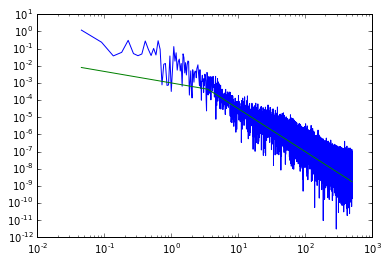

In [46]:
plt.loglog(Z_frequencies[1:], Z_periodograms[5, 1:])
plt.loglog(Z_frequencies[1:], PSD(Z_frequencies[1:], 0.001, 0.67, 2.5, 3.5))

In [79]:
## Smooth and then do a best fit using the defined functions

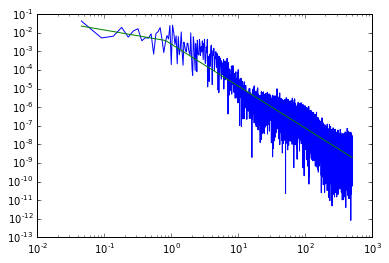

In [67]:
Z_noll = 25

x0 = [0.001, 0.67, 2.5, 3.5]
res_lsq = optimize.least_squares(difference, x0, args=(Z_frequencies[1:], Z_periodograms[Z_noll-1,1:]))

plt.loglog(Z_frequencies[1:], Z_periodograms[Z_noll-1, 1:])
plt.loglog(Z_frequencies[1:], PSD(Z_frequencies[1:], *res_lsq.x))

In [54]:
print res_lsq.x

[ 0.50289662 -0.59532281  4.91322647  0.43325958]
